#### The main goal of this analysis is to explore the correlation between students' academic performance and their mental health condition.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv(
    'data/processed/cleaned_data.csv',
)

In [3]:
df.head(5)

,timestamp,gender,age,course,study_year,cgpa,marital_status,depression,anxiety,panic_attack,specialist_consultation_status
0,2020-07-08 12:02:00,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,2020-07-08 12:04:00,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,2020-07-08 12:05:00,Male,19.0,BIT,year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,2020-07-08 12:06:00,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,2020-07-08 12:13:00,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


Interestingly, despite the presence of mental health concerns, only a small proportion of students reported consulting a specialist.

In [6]:
df.specialist_consultation_status.value_counts()

specialist_consultation_status
No     94
Yes     6
Name: count, dtype: int64

From this, it can be concluded that mental health remains an issue that is often overlooked in educational environments.

***

Now, let’s explore the correlation between marital status and mental health among students.

In [23]:
married_students = df[df.marital_status == 'Yes'].shape[0]
students = df.shape[0]
print(f"Total number of students: {students}")
print(f"Number of married students: {married_students}")

Total number of students: 100
Number of married students: 16


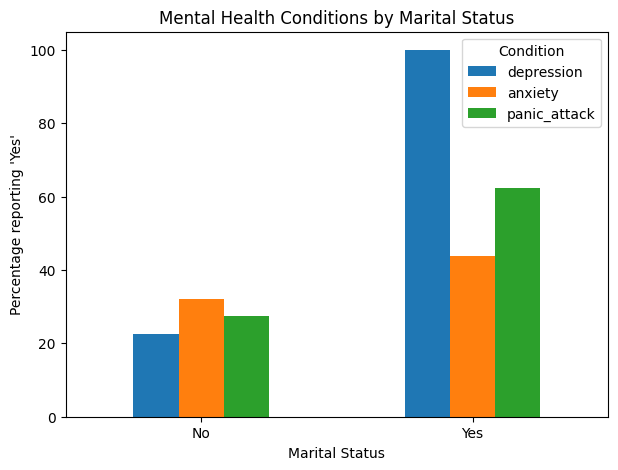

In [31]:
summary = {}
for col in df[['depression', 'anxiety', 'panic_attack']]:
    summary[col] = (
        pd.crosstab(df['marital_status'], df[col], normalize='index')
        .get('Yes', 0) * 100
    )

summary_df = pd.DataFrame(summary)

# Plot
summary_df.plot(kind='bar', figsize=(7, 5))
plt.title("Mental Health Conditions by Marital Status")
plt.ylabel("Percentage reporting 'Yes'")
plt.xlabel("Marital Status")
plt.xticks(rotation=0)
plt.legend(title="Condition")
plt.show()

Among the 100 students surveyed, only 16 are married. Within this small group, a higher percentage reported experiencing depression, anxiety, and panic attacks compared to unmarried students. This suggests a possible association between marital status and mental health, though further analysis and a larger sample would be needed to confirm it.

***

For further analysis we would need to convert CGPA ranges into numeric values by mapping each range to its midpoint

In [16]:
cgpa_map = {
    '0.00 - 1.99': 1.0,
    '2.00 - 2.49': 2.25,
    '2.50 - 2.99': 2.75,
    '3.00 - 3.49': 3.25,
    '3.50 - 4.00': 3.75
}
df['cgpa_num'] = df['cgpa'].map(cgpa_map)

Next => Exploring a Correlation Mental Health Conditions and CGPA

In [23]:
conditions = df[['depression', 'anxiety', 'panic_attack']]
for condition in conditions:
    df[condition + '_num'] = df[condition].map({'Yes': 1, 'No': 0})

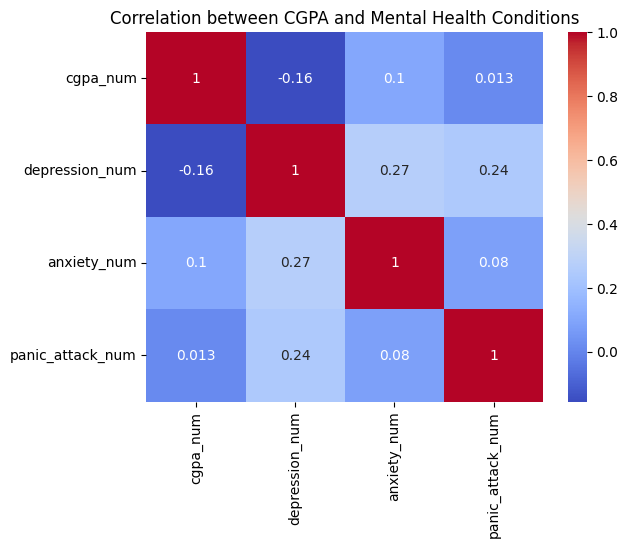

In [24]:
sns.heatmap(df[['cgpa_num', 'depression_num', 'anxiety_num', 'panic_attack_num']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between CGPA and Mental Health Conditions')
plt.show()

The correlation heatmap shows weak relationships between students’ CGPA and reported mental health conditions. The correlation coefficients (ranging between -0.16 and 0.10) suggest that academic performance is not strongly associated with depression, anxiety, or panic attacks in this sample. This implies that, within the given data, mental health factors do not show a clear linear impact on academic outcomes.